In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [25]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv(r'/content/drive/MyDrive/COLLEGE_3RDSEM/hmnist_28_28_RGB.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
# path = '/content/drive/MyDrive/hmnist_28_28_RGB.csv'
# data = pd.read_csv(path)
# data.head()

In [28]:
y = data['label']
x = data.drop(columns = ['label'])

In [29]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path ='/content/drive/MyDrive/COLLEGE_3RDSEM/HAM10000_metadata.csv'
tabular_data = pd.read_csv(path)
tabular_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv(r'/content/drive/MyDrive/COLLEGE_3RDSEM/hmnist_28_28_RGB.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [31]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

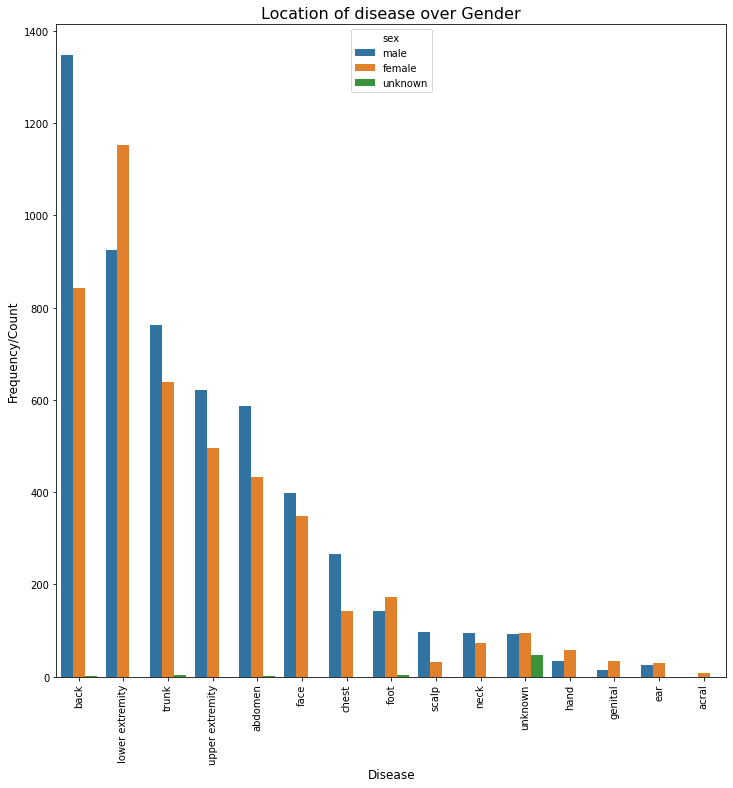

In [32]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [33]:
oversample = RandomOverSampler()
# x,y  = oversample.fit_resample(x,y)

In [34]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (10015, 28, 28, 3)


In [35]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [36]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [37]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [38]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
50/51 [============================>.] - ETA: 0s - loss: 1.0351 - accuracy: 0.6598
Epoch 1: saving model to best_model.h5
51/51 [==============================] - 13s 234ms/step - loss: 1.0344 - accuracy: 0.6600 - val_loss: 0.9983 - val_accuracy: 0.6775
Epoch 2/20
50/51 [============================>.] - ETA: 0s - loss: 0.8847 - accuracy: 0.6742
Epoch 2: saving model to best_model.h5
51/51 [==============================] - 12s 232ms/step - loss: 0.8852 - accuracy: 0.6741 - val_loss: 0.8437 - val_accuracy: 0.6931
Epoch 3/20
50/51 [============================>.] - ETA: 0s - loss: 0.8104 - accuracy: 0.7044
Epoch 3: saving model to best_model.h5
51/51 [==============================] - 12s 229ms/step - loss: 0.8103 - accuracy: 0.7043 - val_loss: 0.8156 - val_accuracy: 0.7205
Epoch 4/20
50/51 [============================>.] - ETA: 0s - loss: 0.7951 - accuracy: 0.7153
Epoch 4: saving model to best_model.h5
51/51 [==============================] - 12s 230ms/step - loss: 0.7952 -

In [39]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

63/63 - 1s - loss: 0.9936 - accuracy: 0.7069 - 972ms/epoch - 15ms/step


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


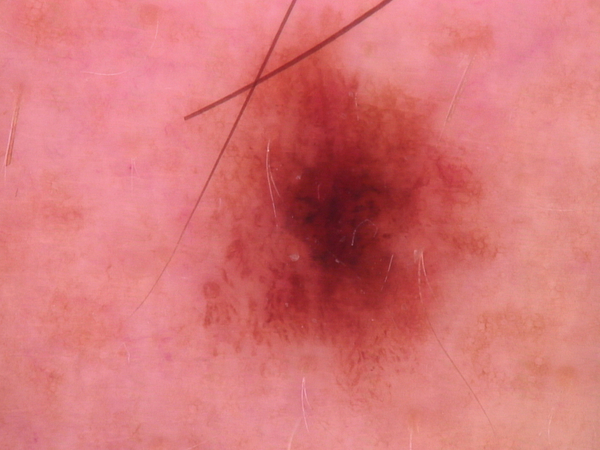

('vasc', ' pyogenic granulomas and hemorrhage')


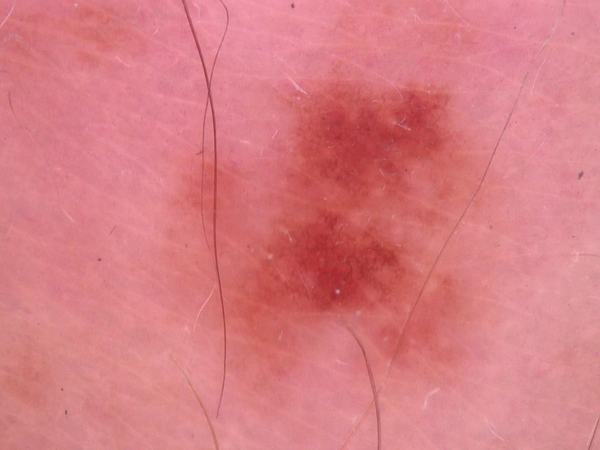

('bcc', ' basal cell carcinoma')


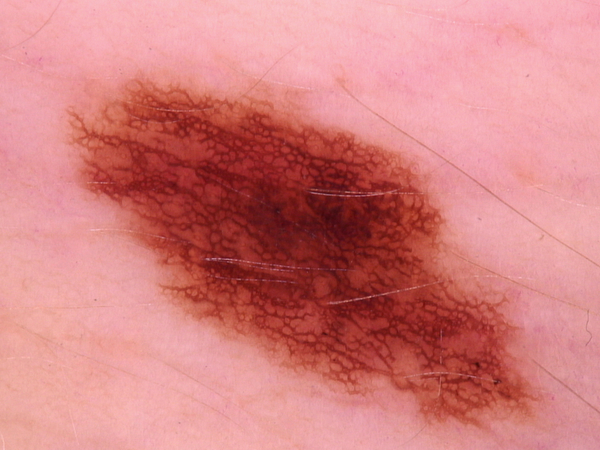

('bcc', ' basal cell carcinoma')


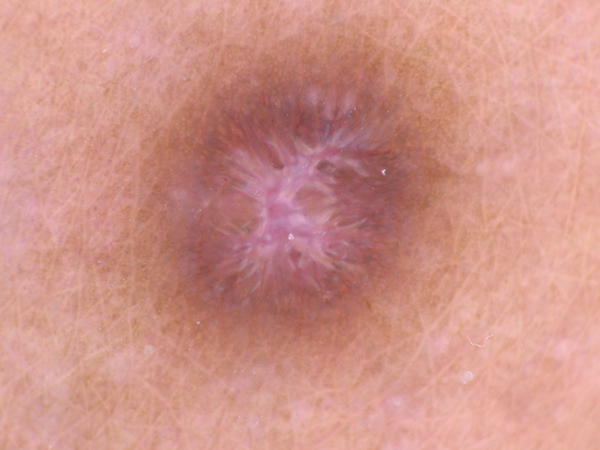

('bcc', ' basal cell carcinoma')


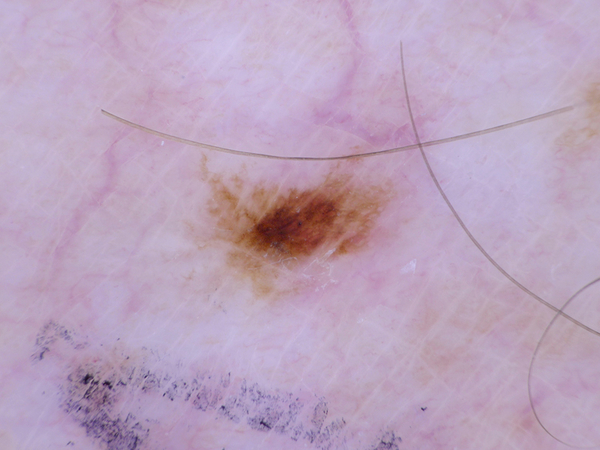

('bcc', ' basal cell carcinoma')


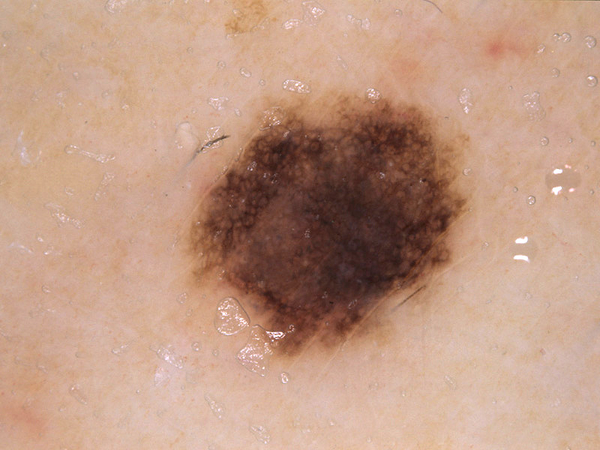

('bcc', ' basal cell carcinoma')


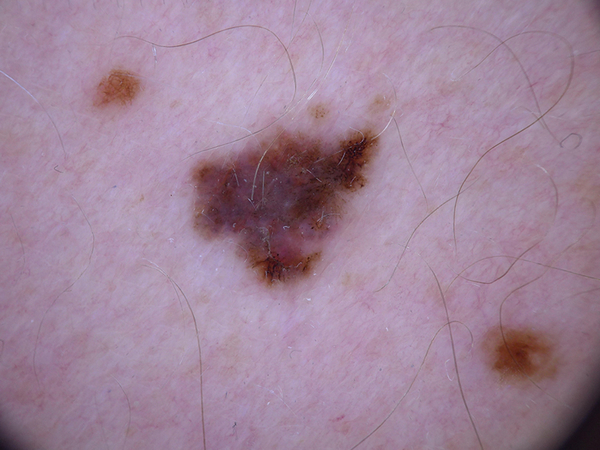

('bcc', ' basal cell carcinoma')


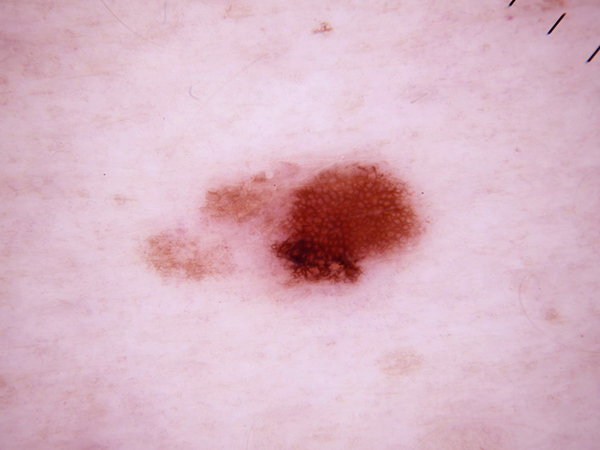

('bcc', ' basal cell carcinoma')


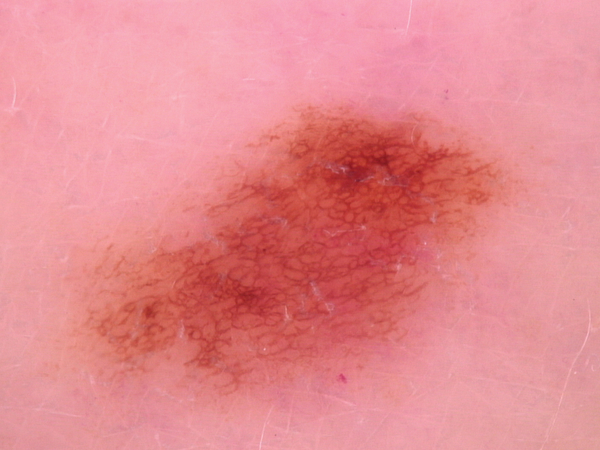

('bcc', ' basal cell carcinoma')


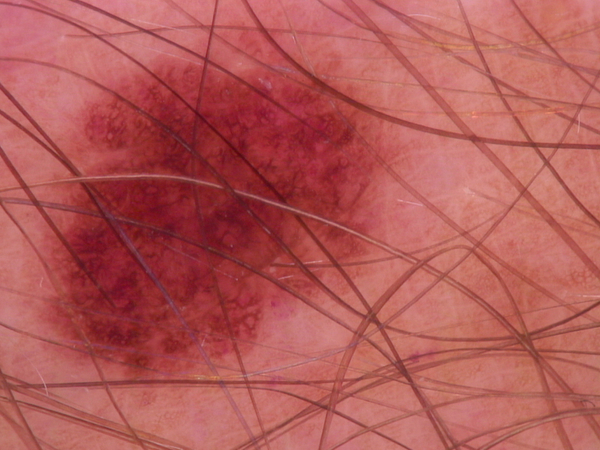

('bcc', ' basal cell carcinoma')


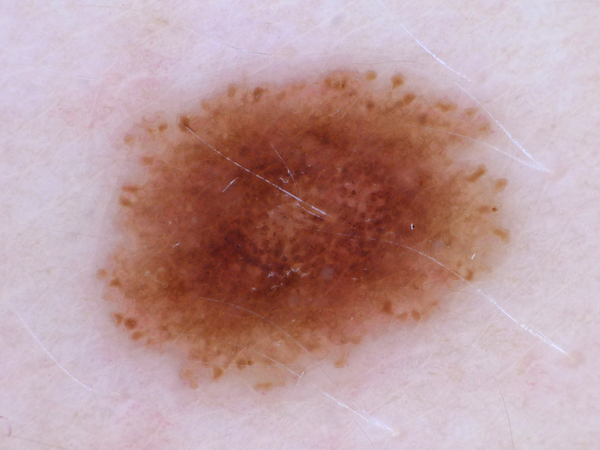

('bcc', ' basal cell carcinoma')


In [40]:
!pip install google.colab
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
srcdir = '/content/drive/MyDrive/COLLEGE_3RDSEM/HAM10000_images_part_1'
#srcdir = r'/C:/Users/deept/OneDrive/Desktop/hackathon/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break